# Experiment 2 - The Bohring World of Hydrogen

## Objective:

The purpose of this experiment is to observe and measure the Balmer series of Hydrogen and use our data to find the Rydberg constant.

## Method:

Setup the materials according to section 1.1 of the lab manual with the discharge tube behind the spectrometer scale, but use the hydrogen tube instead of the helium tube.  

By looking through the grating we were able to observe the spectrum of helium against the spectrometer scale.  To measure the wavelength $\lambda$ of a given spectral line, we measured the distance between the central maximum and the spectral line as viewed on the spectrometer scale, and we measured the distance between the diffraction grating and the spectrometer scale.  We let $a$ denote the distance between the central maximum and the spectral line, and we let $b$ denote the distance between the diffraction grating and the spectrometer scale.  Finally we let $D$ represent the slit density of the diffraction grating, which we determined in experiment 1.

Using standard theory, we therefore have the following relation:

$$ \lambda = \frac{\sin\left(\tan^{-1}\left(\frac{a}{b}\right)\right)}{D} = \frac{a}{D\cdot \sqrt{a^2 + b^2}}$$

This has the following equation for error propagation:

$$\delta\lambda = \sqrt{\dfrac{\left((a^{3} + b^{2}a)\frac{\delta D}{D}\right)^{2} + (b^{2}\delta a)^{2} + (ab\delta b)^{2}}{D^{2}(a^{2}+b^{2})^{3}}}$$


Finally, in order to find the energy level transitions each spectral line of hydrogen corresponded to, we compared our data with the accepted values, which allowed us to determine $n_i$, the energy level of the electron before the transition, for each spectral line.  Together our knowledge of $n_i$ and $\lambda$ allows us to find the Rydberg constant. 


Finally, note that in Experiment 1, we measured $D = 4873 \pm 49$ slits per cm.


## Answers to Data Analysis Problems:

a) Find the standard deviation and standard error for your multiple independent measurements for the position of the Helium D3 line from Experiment 1.1.


The following data table corresponds to the data we took in Experiment 1.1.  Here, "Distance" refers to the distance between the central maximum and the D3 spectral line in centimeters.  




In [7]:
data1

,Distance
0,22.2
1,22.1
2,22.2
3,22.3


The following script calculates the standard deviation and the standard error of this data using the simple formulas for these quantities:

In [8]:
std_dev = ((data1.Distance ** 2).mean() - (data1.Distance.mean())**2)**0.5
std_err = std_dev / 2

print("Standard Deviation: ", std_dev)
print("Standard Error: ", std_err)

Standard Deviation:  0.0707106781186226
Standard Error:  0.0353553390593113


From this we see that:

$$\boxed{
Standard \; Deviation = 0.07\;\text{cm} \\
Standard \; Error = 0.04\;\text{cm}
}$$

a) Make a scatter plot (with error bars) of $\frac{1}{\lambda}$-vs-$\frac{1}{n^2_i}$.


The following data table shows the data we took for this experiment.  Here, "color" refers to the color observed for the given spectral line. Here "a" represents the quantity $a$ from the Method section, with units of centimeters.  We take the standard error calculated in the previous section to be the uncertainty of each measurement of "a".  

In [9]:
data2

,Color,a
0,Blue,10.1
1,Teal,11.7
2,Red,16.5


For all data points, we found $b = 46.9 \pm 0.05 $ cm.  We are therefore able to calculate $\lambda$ for each color using the formula in the method section.  By matching our data to the predicted wavelengths from the Rydberg formula, we are able to find the energy level transition that each of data points corresponds to.  

The following table compiles this information together.  Here "Color" is the color of the spectral line observed, "lambda" is the wavelength in nm, "dlambda" is the uncertainty in "lambda", and "n" is the starting energy level that corresponds to the given data point.

In [10]:
d3

,Color,lambda,dlambda,n
0,Blue,432.024276,23.360825,5
1,Teal,496.714179,33.844799,4
2,Red,681.044669,81.119881,3


This final data table holds the same information as above, but now it includes values of $\frac{1}{\lambda}$.  Here "wl^-1" represents $\frac{1}{\lambda}$, and "dwl^-1" is the associated uncertainty.  Note that both quantities have units of $meters ^ {-1}$ to facilitate later calculations.  The other values in the above table remain the same.

In [21]:
d4

,Color,wl^-1,dwl^-1,n
0,Blue,2.314685e+06,125161.823875,5
1,Teal,2.013230e+06,137176.217853,4
2,Red,1.468332e+06,174894.483327,3


The following script plot values of $\frac{1}{\lambda}$ against values of $\frac{1}{n ^2}$ with error bars.

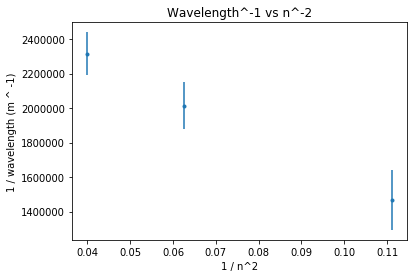

In [24]:
plt.errorbar((1 / d4.n **2) , d4['wl^-1'], yerr=d4['dwl^-1'], fmt='.')
plt.ylabel("1 / wavelength (m ^ -1)")
plt.title("Wavelength^-1 vs n^-2")
plt.xlabel("1 / n^2")
plt.show()

b) Perform a regression to the linear function you found in Question Pre1(c) to find a best-fit value for the slope (with uncertainties).


I will fit the data from the above scatter plot to a linear hypothesis, $\displaystyle \frac{1}{\lambda} = \hat{m}\left(\frac{1}{n^2}\right) + \hat{b}$ using the weighted least squares method.  The following script finds the best fit parameters and their correspond uncertainties.




In [35]:
w = 1 / (d4['dwl^-1'] ** 2)
y = d4['wl^-1']
x = 1 / (d4.n ** 2)

denom = (w.sum() * (w * x * x).sum()) - ((w * x).sum()) **2
m = ((w.sum() * (w * x * y).sum()) - ((w * x).sum()*(w * y).sum())) / denom
b = ((w * y).sum() - m * (w * x).sum())/ (w.sum())
dm = (w.sum() / denom) ** 0.5
db = ((w * x * x).sum() / denom) ** 0.5
print("m: ", m, " +- ", dm)
print("b: ", b, " +- ", db)



m:  -11885121.339421667  +-  3023182.0882392027
b:  2777743.8993566805  +-  208710.35307243734


Therefore we see that the best fit value of the slope is:

$$\boxed{\hat{m} = -1.19 \pm 0.30 \cdot 10^7 \; \text{meters} ^{-1}}$$


c) Based on your fit values, determine the Rydberg constant (with uncertainty). Compare to the given value.


Comparing to Equation (1) in the lab manual, we see that the Rydberg constant is $-\hat{m}$.  Therefore performing a linear fit on our data indicates that:

$$\boxed{ R = 1.19 \pm 0.30 \cdot 10^7 \; \text{meters} ^{-1}}$$

The accepted value for the Rydberg constant is $1.09 \cdot 10^7 \; \text{meters} ^{-1}$.  Performing a simple agreement test between this number and our experimental value yields 0.17, so we see that our experimentally determined value of the Rydberg constant agrees with the accepted value.

# Experiment 3 - Mystery Tubes!

## Objective:
We will determine the gases in the unknown gas tubes by observing and comparing their emission spectra to external references, measure wavelengths of two of the most prominent spectral lines for each tube, and verifying them with research results.

## Method:
- Load tube B into the power supply and and set up the spectrometer as illustrated in the figure below to observe the emitted light.   
![Experiment 4](setup.jpg)   

- Use the sliders to find the distance between the prominent spectral lines and the central maximum and record them.
- Load tube C into power supply and repeat the procedures above.


Note that in the following analysis, we let the variable $b$ equal the distance between the diffraction grating and the spectrometer, and we let the variable $a$ represent the distance between the central maximum and the prominent spectral line we're measuring. So then, to collect data, we simply found $a$ using the sliders and $b$ using the meter stick first for tube B, and then for tube C.  We then used the following equations to determine $\lambda$, the wavelength of each spectral line.

From theory we know that if θ is the angle between the central maximum and the first fringe, d is the slit width of the diffraction grating, and λ is the wavelength of the light being used, we have:

$$\lambda = dsin(\theta)$$   

If $D$ is the slit density of the diffraction grating, then $D = \frac{1}{d}$.  Therefore, based on how the variables were defined,

$$ \theta = \tan ^{-1}\left(\frac{a}{b}\right)$$

So then, 

$$\lambda = \dfrac{sin\theta}{D} = \dfrac{a}{D\sqrt{a^{2}+b^{2}}}$$   
and therefore,   
$$\delta_{\lambda} = \sqrt{\dfrac{((a^{3} + b^{2}a)\frac{\delta_{D}}{D})^{2} + (b^{2}\delta_{a})^{2} + (ab\delta_{b})^{2}}{D^{2}(a^{2}+b^{2})^{3}}}$$   

Finally, it should be noted that in Experiment 1, we measured the slit density D to be $D = 4873\pm49 slits·cm^{-1}$.

## Data Analysis:

### Determine Unknown Gas

The observed emission spectra of tube B 
![B](BNeon.jpg)
The observed emission spectra of tube C
![C](CNitrogen.jpg)   

The possibilities of these gases are given to be Nitrogen, Neon, and Argon, with emission spectra below respectively from the source http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/atspect.html

![Nitrogen](standardNitrogen.jpg)
![Neon](standardNeon.jpg)
![Argon](standardArgon.jpg)

We observed that the emission spectra of B contains a bright yellow line, followed by a series of bright orange and red lines, with a single wide gap between green and yellow lines. The emission spectra of C contains many bright green lines, a bright yellow line, followed by bright red lines with two clear gaps within green lines. By comparing these distinctive features with the provided emission spectrum, we were able to deduce that tube B contains Neon and tube C contains Nitrogen. 

### Measure Prominent Wavelengths
For tube B, we chose to measure the wavelengths of leading yellow and orange lines; and for tube C, we chose to measure the wavelengths of leading green and yellow lines. 

In these tables, 'a' stands for the distance between the spectral line and central maximum with standard error of 0.04 for each measurement and unit of cm; 'b' stands for the distance between diffraction grating and spectrometer with uncertainty of 0.05 for each measurement and unit of cm.

In [11]:
# Data table for tube B:
dfB

,color,b,a
0,yellow,17.3,56.6
1,red,19.2,56.6


In [12]:
# Data table for tube C:
dfC

,color,b,a
0,green,19.7,70.3
1,yellow,21.3,70.3


Using the equations from method sections, we found that for tube B (Neon):   
$$\lambda_{yellow} = 600\pm6.2nm$$   
$$\lambda_{orange} = 659\pm6.8nm$$   
for tube C (Nitrogen):   
$$\lambda_{green} = 515\pm5.1nm$$   
$$\lambda_{yellow} = 554\pm6.1nm$$   


We compared these experimentally determined values to data from National Institute of Standards and Technology https://physics.nist.gov/PhysRefData/Handbook/Tables/neontable2.htm:


According to the data from NIST for Neon, there should be persistent spectral lines at 602.9nm and 659.9nm, so we see that the accepted values agree with the wavelengths we experimentally measured, and strongly support our conclusion that the gas in Tube B is Neon.


According to the data from NIST for nitrogen, there are no persistent spectral lines within range of our experimentally measured wavelengths. However, there should be a persistent spectral line at 568.0nm, which fits into the range of a bright yellow line we observed between 565nm and 590nm. 

We believe that the wavelengths we observed for Tube 3 did not correspond to the persistent wavelengths for Nitrogen simply because there were so many spectral lines for nitrogen that we were unable to properly determine with spectral lines were the most prominent.  The wavelengths we measured did agree with wavelengths of Nitrogen that weren't persistent, and this observation together with the comparison between the images of known spectra indicates that the Gas in tube C is Nitrogen, even though we didn't properly measure the persistent wavelengths.

# Summary and Conclusion:

The objective of this lab was to study the Rydberg formula and the Bohr Model of the atom, observe atomic spectra for other elements, and qualitatively distinguish various spectra from a variety of sources.  In experiment 2, we experimentally verified the Rydberg formula and found a value for the Rydberg constant that agreed with the accepted value.  In experiment 4, we qualitatively distinguished various spectra by comparing each observed spectrum to the spectra of known elements.  Therefore we accomplished all of objectives for the lab.  


With regards to the findings of the experiments reported on in this report, as previously stated, in experiment 2, we were able to use our data to accurately measure the Rydberg constant, and in experiment 4, we determined that the gas in Tube B was Neon, and the gas in Tube C was Nitrogen.


# Contributions of Each Member

Danny and Heidi did equal amounts of work on the actual lab work and on the lab report.


# References

We used Python and the open source libraries Pandas, Matplotlib, and Numpy.

In [22]:
import pandas as pd
import numpy as np
from IPython.display import Image
B = Image('BNeon.jpg')
C = Image('CNitrogen.jpg')
Argon = Image('standardArgon.jpg')
Nitrogen = Image('standardNitrogen.jpg')
Neon = Image('standardNeon.jpg')
setup = Image('setup.jpg')


The following scripts were used to generate the data tables in experiment 4:

In [36]:
B = {'color':['yellow', 'orange'], 'a':[17.3, 19.2], 'b':[56.6, 56.6]}
C = {'color':['green', 'yellow'], 'a':[19.7, 21.3], 'b':[70.3, 70.3]}
dfB = pd.DataFrame(B)
dfC = pd.DataFrame(C)
dfB

,color,a,b
0,yellow,17.3,56.6
1,orange,19.2,56.6


In [37]:
dfB['lambda'] = dfB['a']/(4873e-7 * np.sqrt((dfB['a'])**2 + (dfB['b'])**2))
dfC['lambda'] = dfC['a']/(5233e-7 * np.sqrt(dfC['a']**2 + dfC['b']**2))
dfB

,color,a,b,lambda
0,yellow,17.3,56.6,599.844832
1,orange,19.2,56.6,659.229957


In [38]:
dfC

,color,a,b,lambda
0,green,19.7,70.3,515.637571
1,yellow,21.3,70.3,554.117354


The following scripts were used to find the wavelengths of the spectral lines in experiment 4:

In [40]:
# Propagating error for yellow wavelength of tube B

a = 17.3
b = 56.6
db = 0.05
da = 0.04
D = 4873
dD = 49
dl = np.sqrt((((a**3 + a*b**2)*dD/D)**2 + (b**2 * da)**2 + (a*b*db)**2) /((a**2 + b**2)**3*D**2))
dl

6.18263453404893e-07

In [41]:
# Propagating error for orange wavelength of tube B

a = 19.2
b = 56.6
db = 0.05
da = 0.04
D = 4873
dD = 49
dl = np.sqrt((((a**3 + a*b**2)*dD/D)**2 + (b**2 * da)**2 + (a*b*db)**2) /((a**2 + b**2)**3*D**2))
dl

6.7624764240299e-07

In [42]:
# Propagating error for green wavelength of tube C

a = 17.3
b = 70.3
db = 0.05
da = 0.04
D = 4873
dD = 49
dl = np.sqrt((((a**3 + a*b**2)*dD/D)**2 + (b**2 * da)**2 + (a*b*db)**2) /((a**2 + b**2)**3*D**2))
dl

5.056171316722628e-07

In [43]:
# Propagating error for yellow wavelength of tube C

a = 21.3
b = 70.3
db = 0.05
da = 0.04
D = 4873
dD = 49
dl = np.sqrt((((a**3 + a*b**2)*dD/D)**2 + (b**2 * da)**2 + (a*b*db)**2) /((a**2 + b**2)**3*D**2))
dl

6.082777859038892e-07

The following scripts were used to generate the data tables in experiment 2:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data1 = pd.DataFrame({"Distance": [22.2, 22.1, 22.2, 22.3]})

In [4]:
data2 = pd.DataFrame({"Color": ['Blue', 'Teal', 'Red'],
                     "a": [10.1, 11.7, 16.5]})

In [19]:
d3 = pd.DataFrame()
d2 = data2
d3['Color'] = data2.Color
d3['lambda'] = d2.a / (4873e-7 * (d2.a **2 + 46.9 **2)**0.5)
d3['dlambda'] = ((((d2.a**3) + (d2.a * 46.9**2) * (49/ 4873))**2 + \
                  (0.04 * 46.9**2)**2 + (d2.a * 46.9 * 0.05)**2)/((4873e-7)**2 * (d2.a**2 + 46.9**2)**3))**0.5
d3['n'] = [5, 4, 3]

d4 = pd.DataFrame()
d4['Color'] = d2.Color
d4['wl^-1'] = 1/(d3['lambda'] * 1e-9)
d4['dwl^-1'] = d3.dlambda * 1e9 / (d3['lambda'] ** 2)
d4['n'] = d3.n

In [20]:
d4

,Color,wl^-1,dwl^-1,n
0,Blue,2.314685e+06,125161.823875,5
1,Teal,2.013230e+06,137176.217853,4
2,Red,1.468332e+06,174894.483327,3
